In [2]:
library(affy)
library(affycoretools)

In [3]:
main <- read.csv('data/TGGATES/open_tggates_main.csv',header=TRUE,fileEncoding='LATIN1')

In [4]:
head(main)

COMPOUND_NAME,COMPOUND_ABBREVIATION,COMPOUND_NO,Human...in.vitro,Rat...in.vitro,Rat...in.vivo...Liver...Single,Rat...in.vivo...Liver...Repeat,Rat...in.vivo...Kidney...Single,Rat...in.vivo...Kidney...Repeat
1% cholesterol + 0.25% sodium cholate,CH+DS-Na,00161,,,,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/1%25_cholesterol_%2B_0.25%25_sodium_cholate.Rat.in_vivo.Liver.Repeat.zip,,
"2,4-dinitrophenol",DNP,00154,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/2%2C4-dinitrophenol.Human.in_vitro.Liver.zip,,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/2%2C4-dinitrophenol.Rat.in_vivo.Liver.Single.zip,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/2%2C4-dinitrophenol.Rat.in_vivo.Liver.Repeat.zip,,
2-nitrofluorene,2NF,00160,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/2-nitrofluorene.Human.in_vitro.Liver.zip,,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/2-nitrofluorene.Rat.in_vivo.Liver.Single.zip,,,
3-methylcholanthrene,3-MC,00166,,,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/3-methylcholanthrene.Rat.in_vivo.Liver.Single.zip,,,
acarbose,ACA,00116,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/acarbose.Human.in_vitro.Liver.zip,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vitro/acarbose.Rat.in_vitro.Liver.zip,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Single/acarbose.Rat.in_vivo.Liver.Single.zip,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/acarbose.Rat.in_vivo.Liver.Repeat.zip,,
acetamide,AAA,00169,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Human/in_vitro/acetamide.Human.in_vitro.Liver.zip,,,ftp://ftp.biosciencedbc.jp/archive/open-tggates/LATEST/Rat/in_vivo/Liver/Repeat/acetamide.Rat.in_vivo.Liver.Repeat.zip,,


In [5]:
attfiles <- list.files('data/TGGATES/cel/rat/',pattern='Attribute.tsv',recursive=TRUE,full.names=TRUE)
attfiles <- attfiles[!grepl('No ChipData',attfiles)]
meta <- do.call(rbind,lapply(
    attfiles,
    read.delim,sep='\t',header=TRUE,fileEncoding='LATIN1'
))

In [6]:
meta <- subset(meta,BARCODE!='No ChipData')
dim(meta)

[1] 12701    66

In [7]:
head(meta)

BARCODE,ARR_DESIGN,EXP_ID,GROUP_ID,INDIVIDUAL_ID,ORGAN_ID,MATERIAL_ID,COMPOUND_NAME,COMPOUND.Abbr.,COMPOUND_NO,...,IP.mg.dL.,TP.g.dL.,RALB.g.dL.,A.G,AST.IU.L.,ALT.IU.L.,LDH.IU.L.,GTP.IU.L.,DNA...,LDH...
3017337003,Rat230_2,5171,1,1,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,101.2,100.2
3017337004,Rat230_2,5171,1,2,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,98.8,99.8
3017337011,Rat230_2,5171,2,1,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,102.7,99.5
3017337012,Rat230_2,5171,2,2,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,97.3,100.5
3017337019,Rat230_2,5171,3,1,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,97.9,99.6
3017337020,Rat230_2,5171,3,2,Liver,A,acarbose,ACA,116,...,NA,NA,NA,NA,NA,NA,NA,NA,102.1,100.4


In [8]:
celdirs <- list.dirs('data/TGGATES/cel/rat/liver',recursive=TRUE,full.names=TRUE)

In [9]:
celdirs <- celdirs[grep('celfiles',celdirs)]
head(celdirs)

[1] "data/TGGATES/cel/rat/liver/2-nitrofluorene.Rat.in_vivo.Liver.Single/celfiles"     
[2] "data/TGGATES/cel/rat/liver/2,4-dinitrophenol.Rat.in_vivo.Liver.Single/celfiles"   
[3] "data/TGGATES/cel/rat/liver/3-methylcholanthrene.Rat.in_vivo.Liver.Single/celfiles"
[4] "data/TGGATES/cel/rat/liver/acarbose.Rat.in_vivo.Liver.Single/celfiles"            
[5] "data/TGGATES/cel/rat/liver/acetamidofluorene.Rat.in_vivo.Liver.Single/celfiles"   
[6] "data/TGGATES/cel/rat/liver/acetaminophen.Rat.in_vivo.Liver.Single/celfiles"

In [10]:
length(celdirs)

[1] 158

In [11]:
celfiles <- list.celfiles(celdirs)

In [12]:
matched.names <- sapply(as.character(meta$BARCODE),function(bc){
    celfiles[grep(bc,celfiles)][1]
})

In [13]:
length(matched.names)

[1] 12701

In [14]:
meta <- meta[!is.na(matched.names),]

In [15]:
dim(meta)

[1] 7378   66

In [16]:
rownames(meta) <- matched.names[!is.na(matched.names)]

In [17]:
meta$CEL <- rownames(meta)

In [18]:
meta$SACRI_PERIOD <- factor(meta$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

In [19]:
dim(meta)

[1] 7378   67

In [20]:
length(celfiles)

[1] 7378

In [21]:
celfiles[!(celfiles %in% rownames(meta))]

character(0)

In [22]:
meta.full <- data.frame(meta)

In [23]:
selected.compounds <- levels(meta.full$COMPOUND_NAME)

In [24]:
meta <- subset(meta.full,COMPOUND_NAME %in% selected.compounds)
dim(meta)

[1] 7378   67

In [25]:
meta$CEL <- factor(meta$CEL)

In [26]:
meta$COMPOUND_NAME <- factor(meta$COMPOUND_NAME)

In [27]:
meta$SACRI_PERIOD <- factor(meta$SACRI_PERIOD,levels=levels(meta$SACRI_PERIOD)[order(as.numeric(gsub(' hr','',levels(meta$SACRI_PERIOD))))])

In [28]:
combn <- with(meta,paste(ORGAN_ID,COMPOUND_NAME,DOSE,SACRI_PERIOD,sep='.'))
ref.idx <- meta$DOSE==0 & meta$SACRI_PERIOD=='3 hr'

combn <- relevel(factor(combn),ref=combn[ref.idx][1])

In [29]:
meta$combn <- combn

In [61]:
dim(meta)

[1] 7378   68

In [30]:
levels(meta$COMPOUND_NAME)

[1] "acarbose"                        "acetamidofluorene"              
  [3] "acetaminophen"                   "acetazolamide"                  
  [5] "adapin"                          "ajmaline"                       
  [7] "allopurinol"                     "allyl alcohol"                  
  [9] "amiodarone"                      "amitriptyline"                  
 [11] "aspirin"                         "azathioprine"                   
 [13] "bendazac"                        "benzbromarone"                  
 [15] "benziodarone"                    "bromobenzene"                   
 [17] "bromoethylamine"                 "bucetin"                        
 [19] "buthionine sulfoximine"          "caffeine"                       
 [21] "captopril"                       "carbamazepine"                  
 [23] "carbon tetrachloride"            "carboplatin"                    
 [25] "cephalothin"                     "chloramphenicol"                
 [27] "chlormadinone"                   "chlormezanone"                  
 [29] "chlorpheniramine"                "chlorpromazine"                 
 [31] "chlorpropamide"                  "cimetidine"                     
 [33] "ciprofloxacin"                   "cisplatin"                      
 [35] "clofibrate"                      "clomipramine"                   
 [37] "colchicine"                      "coumarin"                       
 [39] "cycloheximide"                   "cyclophosphamide"               
 [41] "cyclosporine A"                  "danazol"                        
 [43] "dantrolene"                      "diazepam"                       
 [45] "diclofenac"                      "diethyl maleate"                
 [47] "diltiazem"                       "disopyramide"                   
 [49] "disulfiram"                      "doxorubicin"                    
 [51] "enalapril"                       "erythromycin ethylsuccinate"    
 [53] "ethambutol"                      "ethanol"                        
 [55] "ethinylestradiol"                "ethionamide"                    
 [57] "ethionine"                       "etoposide"                      
 [59] "famotidine"                      "fenofibrate"                    
 [61] "fluphenazine"                    "flutamide"                      
 [63] "furosemide"                      "galactosamine"                  
 [65] "gemfibrozil"                     "gentamicin"                     
 [67] "glibenclamide"                   "griseofulvin"                   
 [69] "haloperidol"                     "hexachlorobenzene"              
 [71] "hydroxyzine"                     "ibuprofen"                      
 [73] "imipramine"                      "indomethacin"                   
 [75] "iproniazid"                      "isoniazid"                      
 [77] "ketoconazole"                    "labetalol"                      
 [79] "lomustine"                       "lornoxicam"                     
 [81] "LPS"                             "mefenamic acid"                 
 [83] "meloxicam"                       "metformin"                      
 [85] "methapyrilene"                   "methimazole"                    
 [87] "methyldopa"                      "methyltestosterone"             
 [89] "mexiletine"                      "monocrotaline"                  
 [91] "moxisylyte"                      "naphthyl isothiocyanate"        
 [93] "naproxen"                        "nicotinic acid"                 
 [95] "nifedipine"                      "nimesulide"                     
 [97] "nitrofurantoin"                  "nitrofurazone"                  
 [99] "nitrosodiethylamine"             "omeprazole"                     
[101] "papaverine"                      "pemoline"                       
[103] "penicillamine"                   "perhexiline"                    
[105] "phalloidin"                      "phenacetin"                     
[107] "phenobarbital"                   "phenylanthranilic acid"         
[109] 

In [31]:
tail(meta)

,BARCODE,ARR_DESIGN,EXP_ID,GROUP_ID,INDIVIDUAL_ID,ORGAN_ID,MATERIAL_ID,COMPOUND_NAME,COMPOUND.Abbr.,COMPOUND_NO,...,RALB.g.dL.,A.G,AST.IU.L.,ALT.IU.L.,LDH.IU.L.,GTP.IU.L.,DNA...,LDH...,CEL,combn
003017689010.CEL,003017689010,Rat230_2,181,15,1,Liver,B,WY-14643,WY,30,...,2.6,0.9,74,45,74,1,NA,NA,003017689010.CEL,Liver.WY-14643.100.9 hr
003017689011.CEL,003017689011,Rat230_2,181,15,2,Liver,C,WY-14643,WY,30,...,2.6,0.9,75,50,54,1,NA,NA,003017689011.CEL,Liver.WY-14643.100.9 hr
003017689012.CEL,003017689012,Rat230_2,181,15,4,Liver,B,WY-14643,WY,30,...,2.6,0.9,77,49,47,2,NA,NA,003017689012.CEL,Liver.WY-14643.100.9 hr
003017688028.CEL,003017688028,Rat230_2,181,16,2,Liver,A,WY-14643,WY,30,...,2.7,0.9,99,76,54,1,NA,NA,003017688028.CEL,Liver.WY-14643.100.24 hr
003017688029.CEL,003017688029,Rat230_2,181,16,3,Liver,B,WY-14643,WY,30,...,2.6,1.0,66,47,47,2,NA,NA,003017688029.CEL,Liver.WY-14643.100.24 hr
003017688030.CEL,003017688030,Rat230_2,181,16,4,Liver,B,WY-14643,WY,30,...,2.5,1.0,69,48,47,1,NA,NA,003017688030.CEL,Liver.WY-14643.100.24 hr


In [63]:
meta.expanded <- do.call(rbind,apply(design.all,2,function(x){
    meta[names(x[x>0]),][1,]
}))

ERROR: Error in eval(expr, envir, enclos): object 'meta.expanded.shape' not found


In [68]:
meta.expanded$HOURS <- as.numeric(gsub(' hr','',meta.expanded$SACRI_PERIOD))

In [69]:
dim(meta.expanded)

[1] 2459   69

In [70]:
write.csv(meta.expanded,file='data/TGGATES/cel/rat/meta.csv')

In [32]:
cel.paths <- list.celfiles(celdirs,full.names=TRUE)
names(cel.paths) <- gsub('.+/','',cel.paths)
cel.paths <- cel.paths[celfiles]

In [39]:
write.table(data.frame(cel_files=cel.paths[celfiles %in% rownames(meta)]),file='data/TGGATES/celfiles.txt',quote=FALSE,col.names=TRUE,row.names=FALSE)

In [40]:
system('/opt/apt_2.11.1_linux_64_bitx86_binaries/bin/apt-probeset-summarize -a rma-sketch -d data/TGGATES/Rat230_2.cdf -o data/TGGATES/rma_output --cel-files data/TGGATES/celfiles.txt')

In [33]:
expr.dat <- read.table('data/TGGATES/rma_output/rma-sketch.summary.txt',header=TRUE)

In [34]:
rownames(expr.dat) <- expr.dat[,1]
expr.dat[,1] <- NULL
colnames(expr.dat) <- gsub('X','',colnames(expr.dat))

In [35]:
dim(expr.dat)

[1] 31099  7378

In [72]:
expr.standardized <- (expr.dat-apply(expr.dat,1,mean))/apply(expr.dat,1,sd)

In [73]:
dim(expr.standardized)

[1] 31099  7378

In [76]:
eset <- ExpressionSet(as.matrix(expr.standardized),AnnotatedDataFrame(meta[celfiles[celfiles %in% rownames(meta)],]))

In [77]:
eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 31099 features, 7378 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 003017001001.CEL 003017001002.CEL ... 003017960001.CEL
    (7378 total)
  varLabels: BARCODE ARR_DESIGN ... combn (68 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

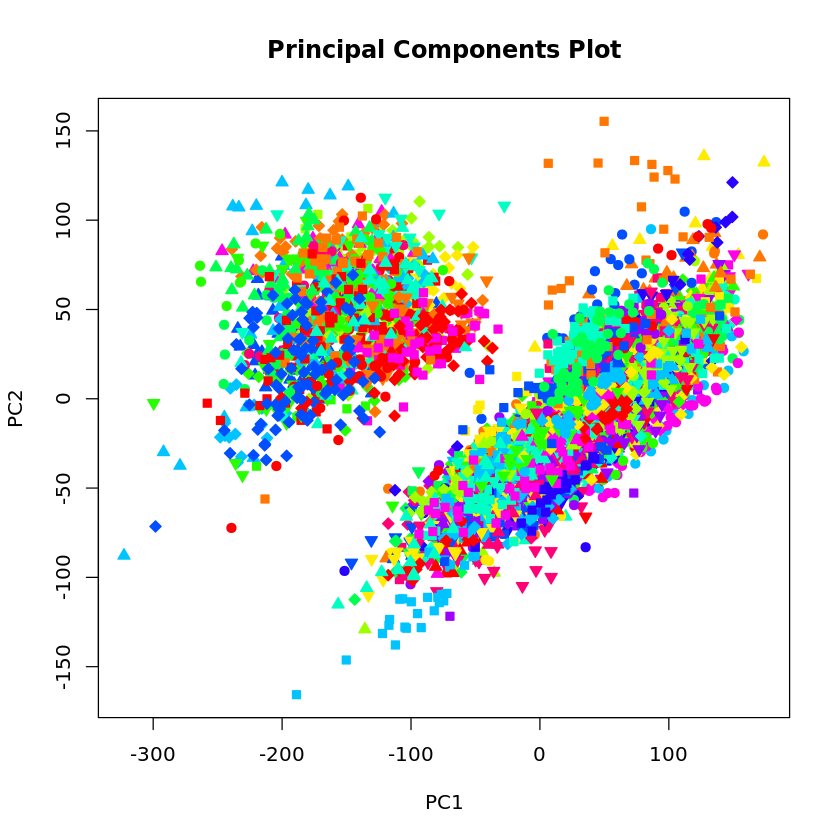

In [78]:
plotPCA(eset, groups =
 pData(eset)$COMPOUND_NAME, groupnames =
 levels(pData(eset)$COMPOUND_NAME), legend=FALSE)

In [87]:
library(limma)

In [88]:
design.all <- model.matrix(~0+combn,data=meta)
head(design.all)

,"combnLiver.2,4-dinitrophenol.0.3 hr",combnLiver.2-nitrofluorene.0.24 hr,combnLiver.2-nitrofluorene.100.24 hr,combnLiver.2-nitrofluorene.1000.24 hr,combnLiver.2-nitrofluorene.300.24 hr,"combnLiver.2,4-dinitrophenol.0.24 hr","combnLiver.2,4-dinitrophenol.0.6 hr","combnLiver.2,4-dinitrophenol.0.9 hr","combnLiver.2,4-dinitrophenol.20.24 hr","combnLiver.2,4-dinitrophenol.20.3 hr",...,combnLiver.WY-14643.10.6 hr,combnLiver.WY-14643.10.9 hr,combnLiver.WY-14643.100.24 hr,combnLiver.WY-14643.100.3 hr,combnLiver.WY-14643.100.6 hr,combnLiver.WY-14643.100.9 hr,combnLiver.WY-14643.30.24 hr,combnLiver.WY-14643.30.3 hr,combnLiver.WY-14643.30.6 hr,combnLiver.WY-14643.30.9 hr
003017911030.CEL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912001.CEL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912002.CEL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912003.CEL,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912004.CEL,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912005.CEL,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
design <- model.matrix(~combn,data=meta)
head(design)

,(Intercept),combnLiver.2-nitrofluorene.0.24 hr,combnLiver.2-nitrofluorene.100.24 hr,combnLiver.2-nitrofluorene.1000.24 hr,combnLiver.2-nitrofluorene.300.24 hr,"combnLiver.2,4-dinitrophenol.0.24 hr","combnLiver.2,4-dinitrophenol.0.6 hr","combnLiver.2,4-dinitrophenol.0.9 hr","combnLiver.2,4-dinitrophenol.20.24 hr","combnLiver.2,4-dinitrophenol.20.3 hr",...,combnLiver.WY-14643.10.6 hr,combnLiver.WY-14643.10.9 hr,combnLiver.WY-14643.100.24 hr,combnLiver.WY-14643.100.3 hr,combnLiver.WY-14643.100.6 hr,combnLiver.WY-14643.100.9 hr,combnLiver.WY-14643.30.24 hr,combnLiver.WY-14643.30.3 hr,combnLiver.WY-14643.30.6 hr,combnLiver.WY-14643.30.9 hr
003017911030.CEL,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912001.CEL,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912002.CEL,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912003.CEL,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912004.CEL,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003017912005.CEL,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
colnames(design.all)[!(colnames(design.all) %in% colnames(design))]

[1] "combnLiver.2,4-dinitrophenol.0.3 hr"

In [83]:
fit <- lmFit(eset, design.all) 

In [84]:
efit <- eBayes(fit)

In [85]:
dim(efit$coefficients)

[1] 31099  2459

In [86]:
head(efit$coefficients)

,"combnLiver.2,4-dinitrophenol.0.3 hr",combnLiver.2-nitrofluorene.0.24 hr,combnLiver.2-nitrofluorene.100.24 hr,combnLiver.2-nitrofluorene.1000.24 hr,combnLiver.2-nitrofluorene.300.24 hr,"combnLiver.2,4-dinitrophenol.0.24 hr","combnLiver.2,4-dinitrophenol.0.6 hr","combnLiver.2,4-dinitrophenol.0.9 hr","combnLiver.2,4-dinitrophenol.20.24 hr","combnLiver.2,4-dinitrophenol.20.3 hr",...,combnLiver.WY-14643.10.6 hr,combnLiver.WY-14643.10.9 hr,combnLiver.WY-14643.100.24 hr,combnLiver.WY-14643.100.3 hr,combnLiver.WY-14643.100.6 hr,combnLiver.WY-14643.100.9 hr,combnLiver.WY-14643.30.24 hr,combnLiver.WY-14643.30.3 hr,combnLiver.WY-14643.30.6 hr,combnLiver.WY-14643.30.9 hr
AFFX-BioB-5_at,-1.945064,-2.185158,-1.535111,-1.541417,-2.168227,-2.103635,-1.672510,-1.766934,-1.516216,-1.743224,...,1.247464,1.2010801,0.9787208,0.9236095,0.7215124,1.0808799,0.9728280,1.1176877,0.9120359,1.0438600
AFFX-BioB-M_at,-1.999618,-2.117663,-1.647730,-1.386378,-2.096685,-1.894100,-1.632984,-1.531207,-1.359094,-1.492627,...,1.224385,1.3234951,0.9459361,0.8919054,0.9204960,0.9875048,0.9611131,1.1666071,0.9474845,1.1267911
AFFX-BioB-3_at,-2.058968,-2.171078,-1.732531,-1.563418,-2.537435,-2.323549,-1.595197,-1.624514,-1.665265,-1.732541,...,1.256902,1.1315748,1.2722319,0.9390926,0.9886886,1.1199179,1.1597974,1.2140237,0.9944588,1.1468436
AFFX-BioC-5_at,-2.325103,-2.063786,-1.740928,-1.461285,-2.334990,-2.301036,-1.938655,-2.031643,-1.481117,-1.533320,...,1.042736,1.0202054,0.8816837,0.7835678,0.7939845,0.8501842,0.9896194,1.0436444,0.8916333,0.9044999
AFFX-BioC-3_at,-2.512402,-2.254614,-1.745257,-1.673157,-2.364173,-2.410116,-1.928565,-2.070705,-1.564921,-1.750057,...,1.135626,1.1574768,1.0289001,0.9096690,0.8825078,1.0770033,1.0456672,1.1954264,1.0633290,1.0801778
AFFX-BioDn-5_at,-2.332051,-2.371526,-1.889826,-1.872748,-2.404252,-2.583090,-2.073763,-2.124682,-1.748896,-1.737557,...,0.912585,0.9158459,0.7728898,0.5394924,0.6099851,0.6218558,0.8224290,0.8578025,0.7133098,0.7395261


In [54]:
write.csv(efit$coefficients,file='data/TGGATES/cel/rat/exprs.scaled.csv')

In [91]:
exprs.fitted <- do.call(cbind,lapply(colnames(design.all),function(i){
    eset@assayData$exprs[,design.all[,i]>0] - efit$coefficients[,i]
}))
head(exprs.fitted)

,003017001013.CEL,003017001014.CEL,003017001015.CEL,003017001001.CEL,003017001002.CEL,003017001003.CEL,003017001004.CEL,003017001005.CEL,003017001006.CEL,003017001010.CEL,...,003017959019.CEL,003017959008.CEL,003017959009.CEL,003017959010.CEL,003017959011.CEL,003017959012.CEL,003017959013.CEL,003017959014.CEL,003017959015.CEL,003017959016.CEL
AFFX-BioB-5_at,0.01688607,0.3340440,-0.3509301,-0.31387112,0.5804824,-0.26661132,-0.18544545,-0.2560254,0.4414709,0.4604496,...,0.07383332,-0.15017778,0.09485999,0.055317789,-0.15270009,-0.004575869,0.15727596,-0.112292936,-0.01027338,0.12256632
AFFX-BioB-M_at,-0.21869795,0.5271352,-0.3084373,-0.26027739,0.3592691,-0.09899175,-0.15338802,-0.2888034,0.4421915,0.3883328,...,0.22050435,-0.09953474,0.08271803,0.016816716,-0.09561550,0.036670978,0.05894452,-0.040090233,0.05039101,-0.01030078
AFFX-BioB-3_at,-0.35606790,0.6449608,-0.2888929,-0.05153628,0.4928698,-0.44133351,-0.16236992,-0.3918591,0.5542290,0.4155122,...,0.26303106,-0.16713195,0.20301433,-0.035882379,-0.05266093,0.037569353,0.01509157,-0.118706186,0.13607239,-0.01736620
AFFX-BioC-5_at,-0.26720801,0.6231532,-0.3559452,-0.24836233,0.3603101,-0.11194782,-0.09151912,-0.3936988,0.4852179,0.6671818,...,0.29120758,-0.18179259,0.18922498,-0.007432393,-0.12139921,0.033030550,0.08836866,-0.011802557,0.10656556,-0.09476301
AFFX-BioC-3_at,-0.25840384,0.6704243,-0.4120205,-0.40079915,0.5878682,-0.18706910,0.03819494,-0.5659113,0.5277164,0.8016945,...,0.28829218,-0.01170715,0.02354417,-0.011837016,-0.16114407,0.129769480,0.03137459,-0.191859703,0.09994847,0.09191123
AFFX-BioDn-5_at,-0.18067157,0.4319219,-0.2512503,-0.22590984,0.4180259,-0.19211603,0.03621799,-0.3574605,0.3212426,0.6184779,...,0.19450111,0.03699607,0.05292526,-0.089921329,-0.13531209,0.077714424,0.05759766,0.002056641,0.03319950,-0.03525614


In [92]:
write.csv(exprs.fitted,file='data/TGGATES/cel/rat/exprs.fitted.csv')

In [93]:
write.csv(design.all[colnames(exprs.fitted),],file='data/TGGATES/cel/rat/exprs.design.csv')